In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

# only the top 10,000 most frequently occurring words in the dataset will be kept

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
#i.e., finding the maximum index in each review and the maximum index across all the reviews.

print(type([max(sequence) for sequence in train_data]))

max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
# Let's decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index= dict([(value,key) for (key,value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
decode_review = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

#this code snippet demonstrates the process of decoding a movie review by mapping integer indices back to their respective words using the word_index and reverse_word_index dictionaries. The resulting decoded review is stored in the decoded_review variable.

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
len(reverse_word_index)

88584

In [ ]:
#a function called vectorize_sequences that takes a list of sequences (e.g., movie reviews) and converts them into a matrix representation suitable for training a neural network.
#vectorize_sequences, that converts a list of sequences into a matrix representation, where each row represents a sequence and each column represents a specific word index. The resulting matrix is then used to vectorize the training and testing data by calling the vectorize_sequences function on train_data and test_data, respectively.
import numpy as np

def vectorize_sequences(sequences, dimension=10000):

  ## Creates an all zero matrix of shape (len(sequences),10K)
  results= np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    ## Sets specific indices of results[i] to 1s
    results[i, sequence]= 1
  return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)



In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape


(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Construction of a deep neural network model using the Keras library.

In [ ]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Input for Validation
X_val= X_train[:10000]
pratial_X_train= X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history= model.fit(pratial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 111ms/step - loss: 0.5507 - binary_accuracy: 0.7779 - val_loss: 0.4457 - val_binary_accuracy: 0.8434
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3472 - binary_accuracy: 0.8955 - val_loss: 0.3301 - val_binary_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2540 - binary_accuracy: 0.9187 - val_loss: 0.2994 - val_binary_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1950 - binary_accuracy: 0.9384 - val_loss: 0.2767 - val_binary_accuracy: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1588 - binary_accuracy: 0.9519 - val_loss: 0.2872 - val_binary_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1311 - binary_accuracy: 0.9603 - val_loss: 0.2950 - val_binary_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - lo

In [ ]:
history_dict= history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

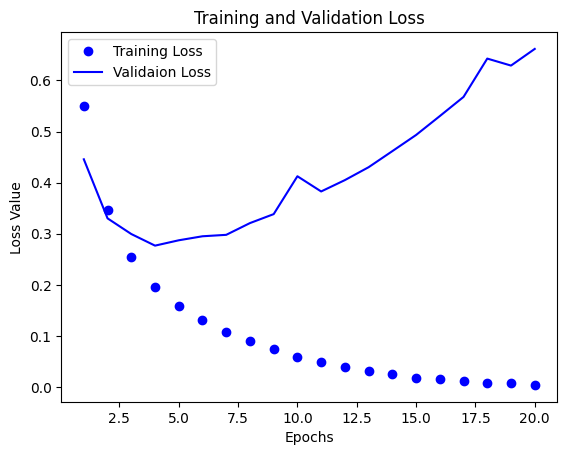

In [ ]:
#plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validaion Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

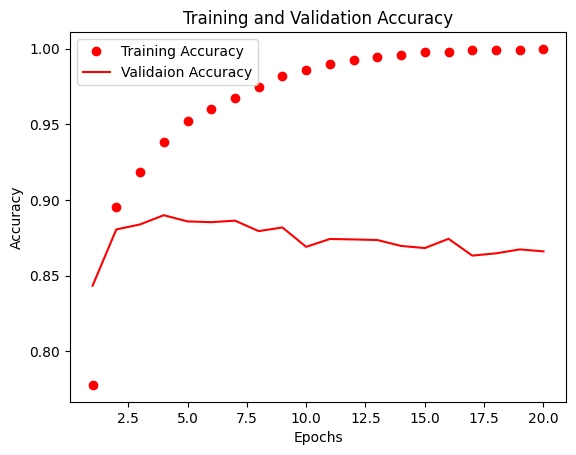

In [ ]:
#plotting accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validaion Accuracy")

plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.fit(pratial_X_train, partial_y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 53ms/step - loss: 0.0048 - binary_accuracy: 0.9993 - val_loss: 0.6887 - val_binary_accuracy: 0.8661
Epoch 2/3
30/30 [==============================] - 1s 35ms/step - loss: 0.0018 - binary_accuracy: 0.9999 - val_loss: 0.7155 - val_binary_accuracy: 0.8663
Epoch 3/3
30/30 [==============================] - 1s 35ms/step - loss: 0.0043 - binary_accuracy: 0.9989 - val_loss: 0.7558 - val_binary_accuracy: 0.8650


In [ ]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result=model.predict(X_test)
result

782/782 [==============================] - 2s 2ms/step


array([[0.00388393],
       [1.        ],
       [0.98598164],
       ...,
       [0.00275204],
       [0.03000889],
       [0.7419817 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = np.zeros(len(result))
for i, score in enumerate(result):
  y_pred[i] = score

mae= mean_absolute_error(y_pred, y_test)
mae

0.1533337742921069

In [ ]:
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=36ea02614405cedc42adf68ed9d906529fd1f9aced73b1a25e5d495c53e424a2
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
#from ann_visualizer import ann_viz
#ann_viz(model, title="Binary Classification of Movie Reviews", filename="imdb_review.gv")